# Introduction


**This is sort of my first project. I have already gotten my hands dirty with some other pricing projects. Lets see how this goes!**

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import os

In [2]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "housing price prediction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Now lets load the datasets

In [76]:
housing_full = pd.read_csv("train.csv", index_col=0)
test = pd.read_csv("test.csv", index_col=0)

Also lets see what our dataset looks like. 

In [4]:
housing_full.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
housing_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

I have 1460 instances in this dataset, which is very small by machine learning standards and 80 columns.

By looking at the information of the data above, there are some missing values such as Fence, MiscFeature etc. This might be quite early, but i think we would have to drop some columns!

Also from the data description the columns; PoolQC, MiscFeature, Fence, GarageQual, GarageType and a lot of other variables have a category NA which doesn't actually represent missing data but that the observation doesnt have that feature i.e None.

I will have to fix this!

## Imputing The Right Values For Missing Values.

In [6]:
missing = [
    "PoolQC",
    "MiscFeature",
    "Alley",
    "Fence",
    "FireplaceQu",
    "LotFrontage",
    "GarageCond",
    "GarageType",
    "GarageYrBlt",
    "GarageFinish",
    "GarageQual",
    "BsmtExposure",
    "BsmtFinType2",
    "BsmtFinType1",
    "BsmtCond",
    "BsmtQual",
    "MasVnrArea",
    "MasVnrType",
    "Electrical",
    
]

housing_full[missing].info()

values = {
    "PoolQC": "No Pool",
    "MiscFeature": "No Feature",
    "Alley": "No alley access",
    "Fence": "No Fence",
    "FireplaceQu": "No Fireplace",
    "GarageCond": "No Garage",
    "GarageType": "No Garage",
    "GarageArea": 0,
    "GarageYrBlt": "None built",
    "GarageFinish": "No Garage",
    "GarageQual": "No Garage",
    "BsmtExposure": "No Basement",
    "BsmtFinType2": "Not Applicable",
    "BsmtFinType1": "Not Applicable",
    "BsmtCond": "No Basement",
    "BsmtQual": "No Basement",
    "MasVnrArea": 0,
    "MasVnrType": "No Veneer",
    "LotFrontage": 0,
}

housing_full.fillna(value=values, inplace=True)
test.fillna(value=values, inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PoolQC        7 non-null      object 
 1   MiscFeature   54 non-null     object 
 2   Alley         91 non-null     object 
 3   Fence         281 non-null    object 
 4   FireplaceQu   770 non-null    object 
 5   LotFrontage   1201 non-null   float64
 6   GarageCond    1379 non-null   object 
 7   GarageType    1379 non-null   object 
 8   GarageYrBlt   1379 non-null   float64
 9   GarageFinish  1379 non-null   object 
 10  GarageQual    1379 non-null   object 
 11  BsmtExposure  1422 non-null   object 
 12  BsmtFinType2  1422 non-null   object 
 13  BsmtFinType1  1423 non-null   object 
 14  BsmtCond      1423 non-null   object 
 15  BsmtQual      1423 non-null   object 
 16  MasVnrArea    1452 non-null   float64
 17  MasVnrType    1452 non-null   object 
 18  Electrical    1459 non-null 

In [7]:
#Also some numerical values which are meant to zero were set to NA. 
Basementmetrics = [
    "BsmtHalfBath",
    "BsmtFullBath",
    "BsmtFinSF1",
    "GarageCars",
    "TotalBsmtSF",
    "BsmtUnfSF",
    "BsmtFinSF2",
]

for Basementmetrics in Basementmetrics:
    housing_full.loc[(housing_full[Basementmetrics].isnull()), Basementmetrics] = 0
    test.loc[(test[Basementmetrics].isnull()), Basementmetrics] = 0

# mising info for Garage cars should be replaced

In [8]:
housing_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

I have successfully inputed the right catergories rather than having missing values which arent even missing values :)

**All the variables containing year must be categorized for this task because our models will interprete them wrongly.**

**Also other variables such as  MSSubClass are represented as numbers whereby they are actually categories**

In [9]:
housing_full.YearBuilt = housing_full.YearBuilt.astype(str)
test.YearBuilt = test.YearBuilt.astype(str)

housing_full.YrSold = housing_full.YrSold.astype(str)
test.YrSold = test.YrSold.astype(str)

housing_full.GarageYrBlt = housing_full.GarageYrBlt.astype(str)
test.GarageYrBlt = test.GarageYrBlt.astype(str)

housing_full.YearRemodAdd = housing_full.YearRemodAdd.astype(str)
test.YearRemodAdd = test.YearRemodAdd.astype(str)

housing_full.MoSold = housing_full.YearBuilt.astype(str)
test.MoSold = test.MoSold.astype(str)

In [10]:
# MSSubClass, Overallcond & OverallQual: we will decode this to avoid wrong interpretation from the models
MSSUbCLass = {
    20: "1-STORY 1946 & NEWER ALL STYLES",
    30: "1-STORY 1945 & OLDER",
    40: "1-STORY W/FINISHED ATTIC ALL AGES",
    45: "1-1/2 STORY - UNFINISHED ALL AGES",
    50: "1-1/2 STORY FINISHED ALL AGES",
    60: "2-STORY 1946 & NEWER",
    70: "2-STORY 1945 & OLDER",
    75: "2-1/2 STORY ALL AGES",
    80: "SPLIT OR MULTI-LEVEL",
    85: "SPLIT FOYER",
    90: "DUPLEX - ALL STYLES AND AGES",
    120: "1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
    150: "1-1/2 STORY PUD - ALL AGES",
    160: "2-STORY PUD - 1946 & NEWER",
    180: "PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
    190: "2 FAMILY CONVERSION - ALL STYLES AND AGES",
}


OverallQualCond = {
    10: "Very Excellent",
    9: "Excellent",
    8: "Very Good",
    7: "Good",
    6: "Above Average",
    5: "Average",
    4: "Below Average",
    3: "Fair",
    2: "Poor",
    1: "Very Poor",
}


housing_full.replace(
    {
        "OverallQual": OverallQualCond,
        "OverallCond": OverallQualCond,
        "MSSubClass": MSSUbCLass,
    },
    inplace=True,
)
test.replace(
    {
        "OverallQual": OverallQualCond,
        "OverallCond": OverallQualCond,
        "MSSubClass": MSSUbCLass,
    },
    inplace=True,
)


# Exploratory Data Analysis
Now lets see what the data looks like(visualisation) and correlation etc.

Only histograms of numerical variables can be plotted using the block of code below.

In [11]:
#Let me see some descriptive stats of the data

pd.set_option("display.max_columns", None)
housing_full.describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1460.0,57.623288,34.664304,0.0,42.00,63.0,79.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.00,0.0,164.25,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.00,1087.0,1391.25,4692.0
2ndFlrSF,1460.0,346.992466,436.528436,0.0,0.00,0.0,728.00,2065.0
LowQualFinSF,1460.0,5.844521,48.623081,0.0,0.00,0.0,0.00,572.0


array([[<AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>],
       [<AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>],
       [<AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>,
        <AxesSubplot:title={'center':'FullBath'}>,
        <AxesSubplot:title={'center':'HalfBath'}>],
       [<AxesSubplot:title={'center':'BedroomAbvGr'}>,
        <AxesSubplot:title={'center':'KitchenAbvGr'}>,
        <AxesSubplot:title={'center':'TotRmsAbvGrd'}>,
        <AxesSubplot:title={'center':'Fire

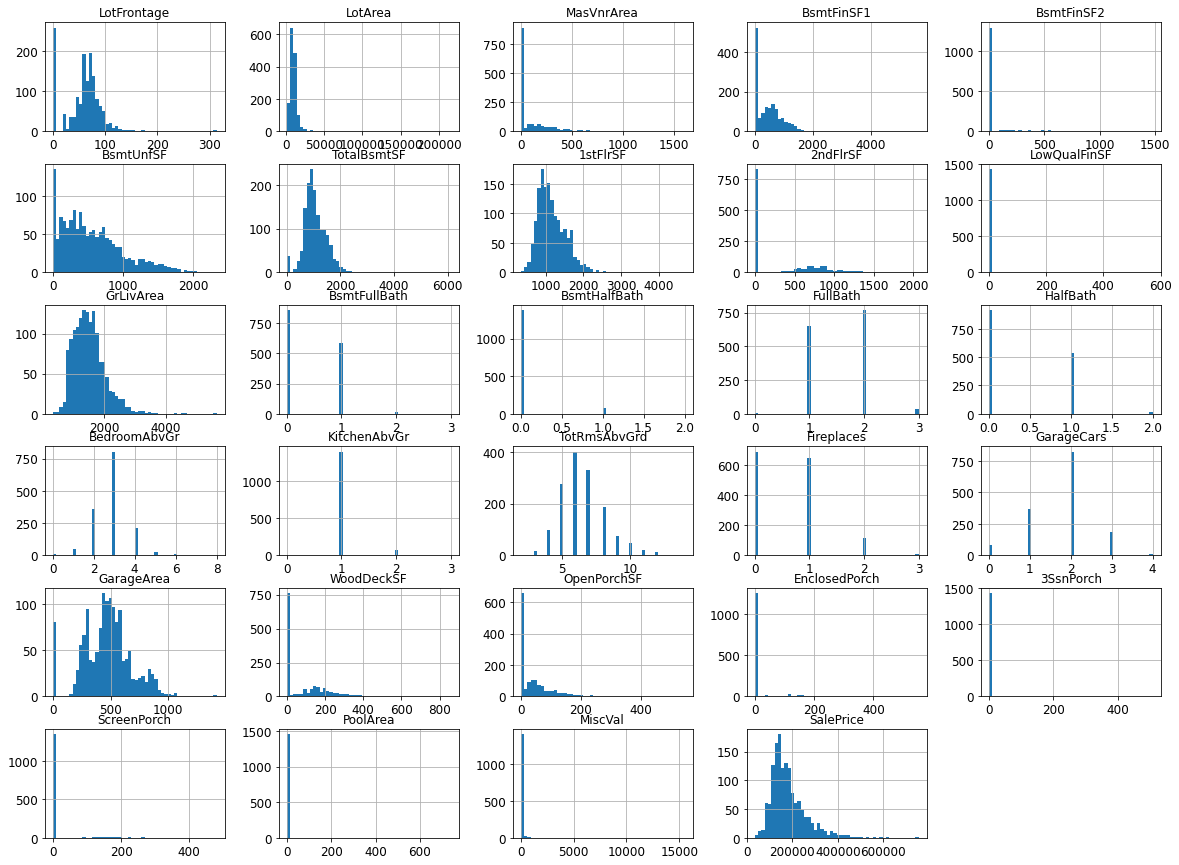

In [12]:
housing_full.hist(bins=50, figsize=(20,15))

In [13]:
#Splitting the data
X = housing_full.drop("SalePrice", axis=1)
y = housing_full["SalePrice"].copy()

from sklearn.model_selection import train_test_split

housing, X_test, housing_labels, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
#Lets start with correlation

corr_matrix = housing_full.corr()

In [15]:
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
LotFrontage      0.209624
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [16]:
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
255,1-STORY 1946 & NEWER ALL STYLES,RL,70.0,8400,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Average,Above Average,1957,1957,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Rec,922,Unf,0,392,1314,GasA,TA,Y,SBrkr,1314,0,0,1314,1,0,1,0,3,1,TA,5,Typ,0,No Fireplace,Attchd,1957.0,RFn,1,294,TA,TA,Y,250,0,0,0,0,0,No Pool,No Fence,No Feature,0,1957,2010,WD,Normal
1067,2-STORY 1946 & NEWER,RL,59.0,7837,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Above Average,Good,1993,1994,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,799,799,GasA,Gd,Y,SBrkr,799,772,0,1571,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,RFn,2,380,TA,TA,Y,0,40,0,0,0,0,No Pool,No Fence,No Feature,0,1993,2009,WD,Normal
639,1-STORY 1945 & OLDER,RL,67.0,8777,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,Average,Good,1910,1950,Gable,CompShg,MetalSd,Wd Sdng,None,0.0,TA,TA,CBlock,Fa,TA,No,Unf,0,Unf,0,796,796,GasA,Gd,Y,FuseA,796,0,0,796,0,0,1,0,2,1,TA,4,Typ,0,No Fireplace,No Garage,None built,No Garage,0,0,No Garage,No Garage,P,328,0,164,0,0,0,No Pool,MnPrv,No Feature,0,1910,2008,WD,Normal
800,1-1/2 STORY FINISHED ALL AGES,RL,60.0,7200,Pave,No alley access,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Feedr,Norm,1Fam,1.5Fin,Average,Good,1937,1950,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,252.0,TA,TA,BrkTil,Gd,TA,No,ALQ,569,Unf,0,162,731,GasA,Ex,Y,SBrkr,981,787,0,1768,1,0,1,1,3,1,Gd,7,Typ,2,TA,Detchd,1939.0,Unf,1,240,TA,TA,Y,0,0,264,0,0,0,No Pool,MnPrv,No Feature,0,1937,2007,WD,Normal
381,1-1/2 STORY FINISHED ALL AGES,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,Average,Above Average,1924,1950,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,LwQ,218,Unf,0,808,1026,GasA,TA,Y,SBrkr,1026,665,0,1691,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Detchd,1924.0,Unf,1,308,TA,TA,Y,0,0,242,0,0,0,No Pool,No Fence,No Feature,0,1924,2010,WD,Normal


In [17]:
housing_num = housing.select_dtypes(include=[np.number])

In [18]:
housing_cat = housing.select_dtypes(include=[object])

In [19]:
#Now lets build pipelines
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline


num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="mean")),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="most_frequent")),
        ('onehotencoder', OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ])


housing_num_tr = num_pipeline.fit_transform(housing_num)

In [20]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = list(housing_cat)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

housing_prepared = preprocessor.fit_transform(housing)

In [21]:
def monkey_patch_get_signature_names_out():
    """Monkey patch some classes which did not handle get_feature_names_out()
       correctly in 1.0.0."""
    from inspect import Signature, signature, Parameter
    
    from sklearn.preprocessing import FunctionTransformer

    default_get_feature_names_out = StandardScaler.get_feature_names_out

    if not hasattr(SimpleImputer, "get_feature_names_out"):
      print("Monkey-patching SimpleImputer.get_feature_names_out()")
      SimpleImputer.get_feature_names_out = default_get_feature_names_out

    if not hasattr(FunctionTransformer, "get_feature_names_out"):
        print("Monkey-patching FunctionTransformer.get_feature_names_out()")
        orig_init = FunctionTransformer.__init__
        orig_sig = signature(orig_init)

        def __init__(*args, feature_names_out=None, **kwargs):
            orig_sig.bind(*args, **kwargs)
            orig_init(*args, **kwargs)
            args[0].feature_names_out = feature_names_out

        __init__.__signature__ = Signature(
            list(signature(orig_init).parameters.values()) + [
                Parameter("feature_names_out", Parameter.KEYWORD_ONLY)])

        def get_feature_names_out(self, names=None):
            if self.feature_names_out is None:
                return default_get_feature_names_out(self, names)
            elif callable(self.feature_names_out):
                return self.feature_names_out(names)
            else:
                return self.feature_names_out

        FunctionTransformer.__init__ = __init__
        FunctionTransformer.get_feature_names_out = get_feature_names_out

monkey_patch_get_signature_names_out()


Monkey-patching SimpleImputer.get_feature_names_out()
Monkey-patching FunctionTransformer.get_feature_names_out()


In [22]:
housing_prepared = pd.DataFrame(
    housing_prepared,
    columns=preprocessor.get_feature_names_out(),
    index=housing.index)

housing_prepared.head()

,num__LotFrontage,num__LotArea,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,num__BsmtUnfSF,num__TotalBsmtSF,num__1stFlrSF,num__2ndFlrSF,num__LowQualFinSF,num__GrLivArea,num__BsmtFullBath,num__BsmtHalfBath,num__FullBath,num__HalfBath,num__BedroomAbvGr,num__KitchenAbvGr,num__TotRmsAbvGrd,num__Fireplaces,num__GarageCars,num__GarageArea,num__WoodDeckSF,num__OpenPorchSF,num__EnclosedPorch,num__3SsnPorch,num__ScreenPorch,num__PoolArea,num__MiscVal,cat__MSSubClass_1-1/2 STORY - UNFINISHED ALL AGES,cat__MSSubClass_1-1/2 STORY FINISHED ALL AGES,cat__MSSubClass_1-STORY 1945 & OLDER,cat__MSSubClass_1-STORY 1946 & NEWER ALL STYLES,cat__MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,cat__MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,cat__MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,cat__MSSubClass_2-1/2 STORY ALL AGES,cat__MSSubClass_2-STORY 1945 & OLDER,cat__MSSubClass_2-STORY 1946 & NEWER,cat__MSSubClass_2-STORY PUD - 1946 & NEWER,cat__MSSubClass_DUPLEX - ALL STYLES AND AGES,cat__MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,cat__MSSubClass_SPLIT FOYER,cat__MSSubClass_SPLIT OR MULTI-LEVEL,cat__MSZoning_C (all),cat__MSZoning_FV,cat__MSZoning_RH,cat__MSZoning_RL,cat__MSZoning_RM,cat__Street_Grvl,cat__Street_Pave,cat__Alley_Grvl,cat__Alley_No alley access,cat__Alley_Pave,cat__LotShape_IR1,cat__LotShape_IR2,cat__LotShape_IR3,cat__LotShape_Reg,cat__LandContour_Bnk,cat__LandContour_HLS,cat__LandContour_Low,cat__LandContour_Lvl,cat__Utilities_AllPub,cat__Utilities_NoSeWa,cat__LotConfig_Corner,cat__LotConfig_CulDSac,cat__LotConfig_FR2,cat__LotConfig_FR3,cat__LotConfig_Inside,cat__LandSlope_Gtl,cat__LandSlope_Mod,cat__LandSlope_Sev,cat__Neighborhood_Blmngtn,cat__Neighborhood_Blueste,cat__Neighborhood_BrDale,cat__Neighborhood_BrkSide,cat__Neighborhood_ClearCr,cat__Neighborhood_CollgCr,cat__Neighborhood_Crawfor,cat__Neighborhood_Edwards,cat__Neighborhood_Gilbert,cat__Neighborhood_IDOTRR,cat__Neighborhood_MeadowV,cat__Neighborhood_Mitchel,cat__Neighborhood_NAmes,cat__Neighborhood_NPkVill,cat__Neighborhood_NWAmes,cat__Neighborhood_NoRidge,cat__Neighborhood_NridgHt,cat__Neighborhood_OldTown,cat__Neighborhood_SWISU,cat__Neighborhood_Sawyer,cat__Neighborhood_SawyerW,cat__Neighborhood_Somerst,cat__Neighborhood_StoneBr,cat__Neighborhood_Timber,cat__Neighborhood_Veenker,cat__Condition1_Artery,cat__Condition1_Feedr,cat__Condition1_Norm,cat__Condition1_PosA,cat__Condition1_PosN,cat__Condition1_RRAe,cat__Condition1_RRAn,cat__Condition1_RRNe,cat__Condition1_RRNn,cat__Condition2_Artery,cat__Condition2_Feedr,cat__Condition2_Norm,cat__Condition2_PosA,cat__Condition2_PosN,cat__Condition2_RRAe,cat__Condition2_RRAn,cat__Condition2_RRNn,cat__BldgType_1Fam,cat__BldgType_2fmCon,cat__BldgType_Duplex,cat__BldgType_Twnhs,cat__BldgType_TwnhsE,cat__HouseStyle_1.5Fin,cat__HouseStyle_1.5Unf,cat__HouseStyle_1Story,cat__HouseStyle_2.5Fin,cat__HouseStyle_2.5Unf,cat__HouseStyle_2Story,cat__HouseStyle_SFoyer,cat__HouseStyle_SLvl,cat__OverallQual_Above Average,cat__OverallQual_Average,cat__OverallQual_Below Average,cat__OverallQual_Excellent,cat__OverallQual_Fair,cat__OverallQual_Good,cat__OverallQual_Poor,cat__OverallQual_Very Excellent,cat__OverallQual_Very Good,cat__OverallQual_Very Poor,cat__OverallCond_Above Average,cat__OverallCond_Average,cat__OverallCond_Below Average,cat__OverallCond_Excellent,cat__OverallCond_Fair,cat__OverallCond_Good,cat__OverallCond_Poor,cat__OverallCond_Very Good,cat__OverallCond_Very Poor,cat__YearBuilt_1872,cat__YearBuilt_1875,cat__YearBuilt_1880,cat__YearBuilt_1882,cat__YearBuilt_1885,cat__YearBuilt_1890,cat__YearBuilt_1892,cat__YearBuilt_1893,cat__YearBuilt_1898,cat__YearBuilt_1900,cat__YearBuilt_1904,cat__YearBuilt_1905,cat__YearBuilt_1906,cat__YearBuilt_1908,cat__YearBuilt_1910,cat__YearBuilt_1911,cat__YearBuilt_1912,cat__YearBuilt_1913,cat__YearBuilt_1914,cat__YearBuilt_1915,cat__YearBuilt_1916,cat__YearBuilt_1917,cat__YearBuilt_1918,cat__YearBuilt_1919,cat__YearBuilt_1920,cat__YearBuilt_1921,cat__YearBuilt_1922

In [23]:
#Now I can make use of rf as base model and also for feature selection

from sklearn.ensemble import RandomForestRegressor

rf_regressor = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', RandomForestRegressor())
])

rf_regressor.fit(housing, housing_labels)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['LotFrontage', 'LotArea',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                                   'GrLivArea', 'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                            

In [24]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

print("Predictions:", list(rf_regressor.predict(some_data)))

Predictions: [145896.0, 176303.15, 91228.5, 168415.01, 137006.45]


In [25]:
print("Labels:", list(some_labels))

Labels: [145000, 178000, 85000, 175000, 127000]


In [26]:
#Now lets evaluate the rf model. ie training error
from sklearn.metrics import mean_squared_error

rf_regressor_predictions = rf_regressor.predict(housing)
rf_regressor_rmse = mean_squared_error(housing_labels, rf_regressor_predictions, squared=False)
rf_regressor_rmse

11791.124763516269

In [27]:
#Lets evaluate the rf using cv
from sklearn.model_selection import cross_val_score

In [28]:
rf_regressor_rmse_scores = -cross_val_score(rf_regressor, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=5)

In [29]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(rf_regressor_rmse_scores)

Scores: [31126.66138899 37384.50885624 36851.82209557 29201.66224645
 23570.87753544]
Mean: 31627.10642453897
Standard deviation: 5127.98957120369


In [30]:
# includes preprocessing
feature_importances = rf_regressor["rf"].feature_importances_
feature_importances

array([6.55617279e-03, 1.53352517e-02, 6.39228738e-03, 3.26226564e-02,
       4.16940190e-04, 5.58588172e-03, 5.84994745e-02, 3.45244805e-02,
       2.14425554e-02, 4.36304733e-05, 2.26538555e-01, 1.02722186e-03,
       1.26348239e-04, 5.74763315e-03, 2.43066071e-03, 3.47440568e-03,
       1.80050082e-03, 3.16802983e-03, 2.57046543e-03, 2.56553562e-01,
       2.25287553e-02, 4.44746635e-03, 5.66389076e-03, 6.75141954e-04,
       5.14137361e-05, 3.21019978e-03, 3.74045358e-04, 6.46325072e-05,
       3.27981866e-06, 1.12166873e-04, 4.53064450e-04, 8.38021328e-04,
       1.45389540e-04, 6.44080095e-08, 1.36307780e-05, 7.57150841e-05,
       1.53106516e-04, 4.55259108e-03, 9.61824279e-05, 3.06866825e-05,
       1.39294956e-06, 3.40661552e-06, 5.46163555e-05, 4.41095160e-05,
       8.61639757e-05, 2.04729073e-05, 9.01371221e-04, 1.00709923e-03,
       9.85447734e-07, 1.71840262e-06, 5.75044929e-05, 3.07162205e-04,
       9.58609570e-05, 3.48706420e-04, 1.73025777e-04, 2.97886646e-04,
      

In [31]:
len(feature_importances)

710

In [32]:
sorted(zip(feature_importances,
           rf_regressor["preprocessor"].get_feature_names_out()),reverse=True)

[(0.2565535619037379, 'num__GarageCars'),
 (0.2265385550191606, 'num__GrLivArea'),
 (0.08463700172271942, 'cat__ExterQual_TA'),
 (0.05849947454981353, 'num__TotalBsmtSF'),
 (0.03503770436628517, 'cat__BsmtQual_Ex'),
 (0.034524480461671406, 'num__1stFlrSF'),
 (0.03262265636133555, 'num__BsmtFinSF1'),
 (0.02252875529100384, 'num__GarageArea'),
 (0.021442555374281583, 'num__2ndFlrSF'),
 (0.016118797771046592, 'cat__KitchenQual_Ex'),
 (0.01533525168941152, 'num__LotArea'),
 (0.012231749540004966, 'cat__OverallQual_Very Good'),
 (0.009299159709298876, 'cat__KitchenQual_TA'),
 (0.0066329722356723445, 'cat__BsmtQual_Gd'),
 (0.00655617278634037, 'num__LotFrontage'),
 (0.006392287381053872, 'num__MasVnrArea'),
 (0.005747633151694258, 'num__FullBath'),
 (0.005663890761123283, 'num__OpenPorchSF'),
 (0.005585881721499153, 'num__BsmtUnfSF'),
 (0.005208205298674404, 'cat__BsmtQual_TA'),
 (0.005031841871249703, 'cat__ExterQual_Gd'),
 (0.004552591082581154, 'cat__MSSubClass_2-STORY 1946 & NEWER'),
 (0

The best estimator overfits the training set. Hence I will not be using it for anything, for now atleast.

Now I will select the optimal no of features and the best strategy of filling missing values


Now its time to use GridSearch to find the optimal number of features to select

In [33]:
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal

selector = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', SelectFromModel(RandomForestRegressor(random_state=42))),
    ('rf', RandomForestRegressor()),
    
])


param_distribs = {'selector__threshold': np.arange(0.001, 0.1, 0.001)}

In [34]:
selector_rnd_search = RandomizedSearchCV(selector,param_distributions=param_distribs,
                                n_iter=100, cv=5, scoring="neg_root_mean_squared_error", random_state=42,
                                            return_train_score=True)

In [35]:
selector_rnd_search.fit(housing, housing_labels)

C:\Users\nwokedi.m.j\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 99 is smaller than n_iter=100. Running 99 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('std_scaler',
                                                                                                StandardScaler())]),
                                                                               ['LotFrontage',
                                                                                'LotArea',
                                                                                'MasVnrArea',
                                                                                'BsmtFinSF1',
     

In [36]:
selector_rnd_search.best_params_

{'selector__threshold': 0.001}

In [37]:
cv_res_selector_rnd = pd.DataFrame(selector_rnd_search.cv_results_)
cv_res_selector_rnd.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res_selector_rnd

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_selector__threshold,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.199495,0.182544,0.047056,0.002475,0.001,{'selector__threshold': 0.001},-32239.714678,-37753.405522,-36788.535153,-28471.574638,-24082.949118,-31867.235822,5121.143539,1,-11772.059078,-11253.932450,-11354.483969,-12536.347011,-12619.278972,-11907.220296,575.047649
1,3.799175,0.180558,0.044716,0.004408,0.002,{'selector__threshold': 0.002},-30499.992224,-37756.615307,-38662.254175,-29308.895260,-24343.915998,-32114.334593,5395.675653,2,-12061.891023,-11133.580001,-11646.659879,-12960.180255,-12732.803189,-12107.022869,675.431790
2,3.983417,0.153994,0.045864,0.006650,0.003,{'selector__threshold': 0.003},-31488.120420,-40225.857203,-38762.447111,-29395.693007,-24815.126462,-32937.448841,5790.823938,3,-12126.975222,-11329.756705,-12752.450541,-12474.037233,-12531.026893,-12242.849319,498.668728
5,3.638254,0.147992,0.049706,0.004474,0.006,{'selector__threshold': 0.006},-30319.094584,-40014.120168,-37789.516240,-30252.394818,-26871.475652,-33049.320293,4988.398217,4,-12694.630326,-11650.032270,-11571.701823,-12616.911689,-13095.891663,-12325.833554,606.489748
3,3.657272,0.110801,0.044014,0.002640,0.004,{'selector__threshold': 0.004},-31878.681609,-40097.166162,-39200.442989,-29811.009532,-25572.729828,-33312.006024,5566.325167,5,-12065.313190,-11935.166212,-12111.199083,-12969.186102,-13185.028578,-12453.178633,517.222299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,3.082718,0.068387,0.046870,0.005460,0.098,{'selector__threshold': 0.098},-48651.545816,-62041.263003,-55403.434608,-44286.446112,-42561.238837,-50588.785675,7242.292065,95,-20171.441024,-21540.214725,-22224.764757,-20289.981296,-24899.951184,-21825.270597,1719.696406
96,3.903788,0.534115,0.064707,0.019854,0.097,{'selector__threshold': 0.097},-50805.768256,-61748.008824,-54477.123753,-44010.525529,-42063.357010,-50620.956675,7150.465458,96,-19836.732678,-21657.606717,-21964.265773,-21257.565120,-24717.033065,-21886.640671,1591.694829
94,3.343355,0.168731,0.048220,0.003413,0.095,{'selector__threshold': 0.095},-49593.409339,-61844.584031,-54934.287927,-44178.382589,-42653.745429,-50640.881863,7079.713580,97,-20186.120834,-21550.216895,-22296.621111,-20455.790521,-24725.382190,-21842.826310,1629.062289
90,3.576792,0.245567,0.046018,0.002346,0.091,{'selector__threshold': 0.091},-49631.994463,-61555.456550,-54658.693797,-44676.115559,-42745.356512,-50653.523376,6844.056775,98,-20217.298323,-21588.454524,-22166.492048,-20496.324540,-23814.848016,-21656.683490,1291.549196


Now lets check if setting threshold as 0.001 will improve the performance of our model because it doesnt look like it would

In [38]:
selector = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', SelectFromModel(RandomForestRegressor(random_state=42), 
                                threshold=0.001)),# min feature importance
    ('rf', RandomForestRegressor(random_state=42)),
    
])

selector.fit(housing, housing_labels)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['LotFrontage', 'LotArea',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                                   'GrLivArea', 'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                            

In [39]:
selector_predictions = selector.predict(housing)
selector_rmse = mean_squared_error(housing_labels, selector_predictions, squared=False)
selector_rmse

11362.39927869928

In [40]:
selector_rmse_scores = -cross_val_score(selector, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=5)

In [41]:
display_scores(selector_rmse_scores)

Scores: [30660.69965713 38474.00605694 38204.98356314 27881.01232783
 24471.18372804]
Mean: 31938.37706661437
Standard deviation: 5582.803020408223


From above, feature selection doesnt improve our model, so we dont perform it!

The following below would take place if feature selection improves the performance of our model

-I will go ahead to update the preprocessor

In [42]:
"""
full_preprocessor = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', SelectFromModel(RandomForestRegressor(random_state=42),
                                threshold=)),  # min feature importance
    
])

full_preprocessor.fit(housing, housing_labels)
"""

"\nfull_preprocessor = Pipeline([\n    ('preprocessor', preprocessor),\n    ('selector', SelectFromModel(RandomForestRegressor(random_state=42),\n                                threshold=)),  # min feature importance\n    \n])\n\nfull_preprocessor.fit(housing, housing_labels)\n"

I will now train a SVM Regressor

In [43]:
from sklearn.svm import SVR

svr_regressor = Pipeline([
    ('preprocessor', preprocessor),
    ('svr', SVR(kernel='rbf'))
])

svr_regressor.fit(housing, housing_labels)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['LotFrontage', 'LotArea',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                                   'GrLivArea', 'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                            

In [44]:
print("Predictions:", list(svr_regressor.predict(some_data)))

Predictions: [164940.54845139725, 165020.95162115997, 164923.07918779278, 164976.43342205227, 164958.57494382697]


In [45]:
print("Labels:", list(some_labels))

Labels: [145000, 178000, 85000, 175000, 127000]


In [46]:
svr_regressor_predictions = svr_regressor.predict(housing)
svr_regressor_rmse = mean_squared_error(housing_labels, svr_regressor_predictions, squared=False)
svr_regressor_rmse

78928.09608890832

In [47]:
svr_regressor_rmse_scores = -cross_val_score(svr_regressor, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=5)

In [48]:
display_scores(svr_regressor_rmse_scores)

Scores: [84343.1935656  76665.02773944 85999.6905223  74330.38255328
 72754.03338647]
Mean: 78818.46555341702
Standard deviation: 5360.039787251743


**The svm performs worse than the random forest**

In [49]:
from xgboost import XGBRegressor

xgb_regressor = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb', XGBRegressor())
])

xgb_regressor.fit(housing, housing_labels)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['LotFrontage', 'LotArea',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                                   'GrLivArea', 'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                            

In [50]:
print("Predictions:", list(xgb_regressor.predict(some_data)))

Predictions: [145348.42, 177443.89, 86009.6, 173013.1, 129317.57]


In [51]:
print("Labels:", list(some_labels))

Labels: [145000, 178000, 85000, 175000, 127000]


In [52]:
xgb_regressor_predictions = xgb_regressor.predict(housing)
xgb_regressor_rmse = mean_squared_error(housing_labels, xgb_regressor_predictions, squared=False)
xgb_regressor_rmse

2245.657628634419

In [53]:
xgb_regressor_rmse_scores = -cross_val_score(xgb_regressor, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=5)

In [54]:
display_scores(xgb_regressor_rmse_scores)

Scores: [37976.19151065 38295.18086172 33728.63871774 30521.22144508
 26834.02960438]
Mean: 33471.05242791368
Standard deviation: 4390.590365420653


**As it is above, the xgb regressor overfits the training set**

In [55]:
from sklearn.linear_model import LinearRegression

linear_regressor = Pipeline([
    ('preprocessor', preprocessor),
    ('lr', LinearRegression()),
    
])

linear_regressor.fit(housing, housing_labels)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['LotFrontage', 'LotArea',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                                   'GrLivArea', 'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                            

In [56]:
print("Predictions:", list(linear_regressor.predict(some_data)))

Predictions: [146008.0, 166560.0, 88592.0, 174080.0, 144248.0]


In [57]:
print("Labels:", list(some_labels))

Labels: [145000, 178000, 85000, 175000, 127000]


In [58]:
linear_regressor_predictions = linear_regressor.predict(housing)
linear_regressor_rmse = mean_squared_error(housing_labels, linear_regressor_predictions, squared=False)
linear_regressor_rmse

15665.963489432306

In [59]:
linear_regressor_rmse_scores = -cross_val_score(linear_regressor, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=5)

In [60]:
display_scores(linear_regressor_rmse_scores)

Scores: [1.72910601e+15 5.22406357e+14 5.29104362e+15 1.32753270e+15
 5.20668622e+14]
Mean: 1878151463814438.8
Standard deviation: 1769408541347410.0


**What in the hell of overfitting is that from the linear regressor :(**

In [61]:
from sklearn.tree import DecisionTreeRegressor

tree_regressor = Pipeline([
    ('preprocessor', preprocessor),
    ('tree', DecisionTreeRegressor()),
    
])

tree_regressor.fit(housing, housing_labels)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['LotFrontage', 'LotArea',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                                   'GrLivArea', 'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                            

In [62]:
print("Predictions:", list(tree_regressor.predict(some_data)))

Predictions: [145000.0, 178000.0, 85000.0, 175000.0, 127000.0]


In [63]:
print("Labels:", list(some_labels))

Labels: [145000, 178000, 85000, 175000, 127000]


In [64]:
tree_regressor_predictions = tree_regressor.predict(housing)
tree_regressor_rmse = mean_squared_error(housing_labels, tree_regressor_predictions, squared=False)
tree_regressor_rmse

0.0

In [65]:
tree_regressor_rmse_scores = -cross_val_score(xgb_regressor, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=5)

In [66]:
display_scores(tree_regressor_rmse_scores)

Scores: [37976.19151065 38295.18086172 33728.63871774 30521.22144508
 26834.02960438]
Mean: 33471.05242791368
Standard deviation: 4390.590365420653


The decision tree regressor also overfits.

### Making Predictions On The Test Set

The random forest regressor is the most sensible model that I have tested so far so I am going to use that to make predictions on the test set. Tuning the hyperparameters doesnt improve the random forest regressor on this task

In [67]:
rf_regressor.predict(X_test)

array([136987.25, 289577.8 , 113972.  , 151575.34, 299681.35,  85729.33,
       207161.  , 152500.5 ,  86032.83, 127228.75, 141811.87, 119045.5 ,
       152741.24, 208438.64, 176650.9 , 123647.5 , 196231.42, 132880.5 ,
       116143.  , 213531.  , 172139.9 , 190492.17, 174585.43, 123763.5 ,
       194459.01, 182997.72, 184293.23, 112913.35, 178470.97, 197711.97,
       124952.  , 278969.52, 191416.01, 116048.  , 254491.91, 142661.25,
       147424.99, 208912.62, 291206.91, 110114.5 , 123539.33, 238866.66,
       119884.  , 378671.42, 140288.7 , 138006.2 , 119652.  , 129588.  ,
       389849.07, 152586.51, 123152.5 , 204902.5 , 123312.94, 297059.56,
       140523.95, 264466.89, 187757.5 , 152427.32, 139894.37, 107490.82,
        75919.  , 155361.24, 303475.21, 245601.49, 300124.86, 214776.8 ,
       110291.04, 297375.38, 107282.  , 161880.85, 128787.13, 131644.75,
       116598.5 ,  90791.  , 447205.97, 179325.17, 298886.32, 324327.95,
       138556.  , 125196.  ,  94648.  , 109916.  , 

In [68]:
#Evaluating the model on test set
X_test_predictions = rf_regressor.predict(X_test)

X_test_rmse = mean_squared_error(y_test, X_test_predictions, squared=False)
X_test_rmse

29963.314135224264

The rmse on the test set shows that the random forest regressor generalises well!

### Making Predictions On Test Set To Be Submitted 

In [69]:
final_predictions = rf_regressor.predict(test)
final_predictions

array([127986.34, 160854.75, 187938.09, ..., 155606.74, 111328.5 ,
       219697.67])

In [70]:
num = range(1461, 2920)
index = list(num)

In [71]:
#Create DataFrame of predictions
submission = pd.DataFrame(final_predictions, index=index, columns=['SalePrice'])
submission

,SalePrice
1461,127986.34
1462,160854.75
1463,187938.09
1464,186987.47
1465,212213.49
...,...
2915,90490.50
2916,92893.00
2917,155606.74
2918,111328.50


In [72]:
#Coverting DataFrame to .csv
submission.to_csv('submission.csv', index=False)